In [1]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [5]:
subscription_key = "e400e3bf0a09443d880e5bf0e1895eb8"
vision_base_url = "https://southeastasia.api.cognitive.microsoft.com/vision/v2.0/"
analyze_url = vision_base_url + "analyze"#analyze為功能名稱
image_path = "media/street.JPG"#本機圖片路徑
image_data = open(image_path ,'rb').read()#讀取圖片檔
headers = {'Ocp-Apim-Subscription-Key':subscription_key,#'Content-Type':'application/octet-stream'表示要用二進位數據傳輸，
           'Content-Type':'application/octet-stream'}   #伺服器會將客戶端資料以附件方式保存
headers


{'Ocp-Apim-Subscription-Key': 'e400e3bf0a09443d880e5bf0e1895eb8',
 'Content-Type': 'application/octet-stream'}

In [6]:
params = {'visualFeatures':'Categories,Description,Color'}
response = requests.post(analyze_url,headers = headers,params = params , data = image_data)#image_data為圖檔
analysis = response.json()
print(analysis)

{'categories': [{'name': 'outdoor_street', 'score': 0.9609375, 'detail': {'landmarks': []}}], 'color': {'dominantColorForeground': 'Grey', 'dominantColorBackground': 'Grey', 'dominantColors': ['Grey', 'White'], 'accentColor': '624738', 'isBwImg': False, 'isBWImg': False}, 'description': {'tags': ['building', 'outdoor', 'person', 'people', 'street', 'walking', 'group', 'city', 'woman', 'sitting', 'sidewalk', 'standing', 'table', 'man', 'holding', 'busy', 'crowded', 'road', 'riding', 'crowd'], 'captions': [{'text': 'a group of people walking on a city street', 'confidence': 0.9787938074645095}]}, 'requestId': '3b456f69-e1ae-4c06-b562-dfc6bca37e2f', 'metadata': {'width': 1600, 'height': 901, 'format': 'Jpeg'}}


In [ ]:
#顯示圖片及圖片描述

In [8]:
image_caption = analysis["description"]["captions"][0]["text"]
image_caption

'a group of people walking on a city street'

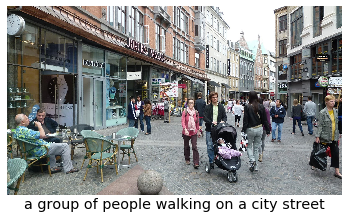

In [9]:
image = Image.open(BytesIO(image_data))#直接讀取本機圖片檔
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)